In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras import layers, optimizers, losses
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
epochs = 10
batch_size = 128

In [ ]:
#===============================================================================
# Prepare data

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#===============================================================================
# Create Layers + Model

input_img = layers.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

from tensorflow import keras as keras
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=losses.binary_crossentropy)

In [ ]:
#===============================================================================
# Train the Model

autoencoder.fit(x_train_noisy, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 18s 15ms/step - loss: 0.1685 - val_loss: 0.1179
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1140 - val_loss: 0.1088
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1080 - val_loss: 0.1051
Epoch 4/10
469/469 [==============================] - 8s 18ms/step - loss: 0.1050 - val_loss: 0.1028
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1031 - val_loss: 0.1016
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1017 - val_loss: 0.1007
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1007 - val_loss: 0.0995
Epoch 8/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0999 - val_loss: 0.0987
Epoch 9/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0992 - val_loss: 0.0981
Epoch 10/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0986 - val_l

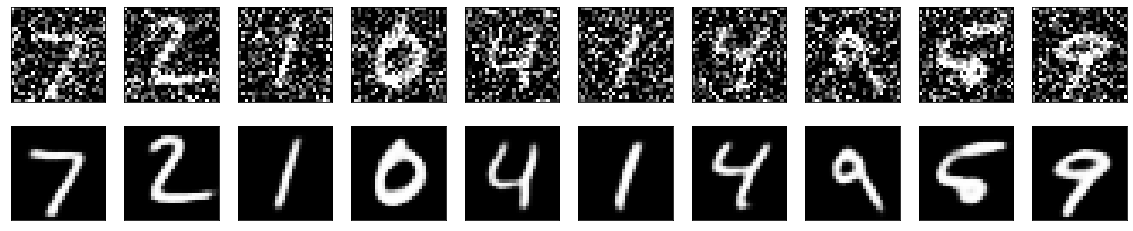

In [ ]:
#===============================================================================
# Predict + Visualization

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Save Entire Model
autoencoder.save('/content/drive/My Drive/model.h5')
# save weight Model
autoencoder.save_weights('/content/drive/My Drive/model_weights.h5')